In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
from catboost.utils import get_confusion_matrix

In [119]:
sns.set(style="whitegrid")

In [120]:
pass_df = pd.read_csv('AirPass.zip', index_col= 'Unnamed: 0')
pass_df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [121]:
pass_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [122]:
pass_df['Arrival Delay in Minutes'] = pass_df['Arrival Delay in Minutes'].fillna(pass_df['Arrival Delay in Minutes'].median())

In [123]:
round(pass_df['Arrival Delay in Minutes'].mean(), 2)

15.13

In [124]:
pass_df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [125]:
gender_satisfied = pass_df.groupby(['Gender', 'satisfaction']).size().unstack()
gender_satisfied

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,30193,22534
Male,28686,22491


In [126]:
gender_satisfied.index

Index(['Female', 'Male'], dtype='object', name='Gender')

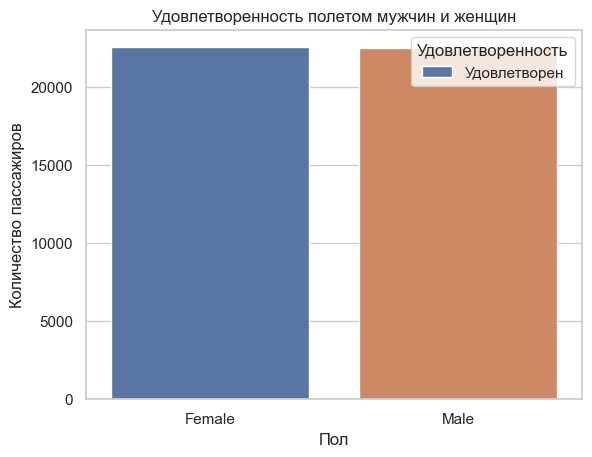

In [127]:


sns.barplot(x=gender_satisfied.index, y="satisfied", data=gender_satisfied, label='Удовлетворен')

plt.title('Удовлетворенность полетом мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.legend(title='Удовлетворенность')

plt.show()

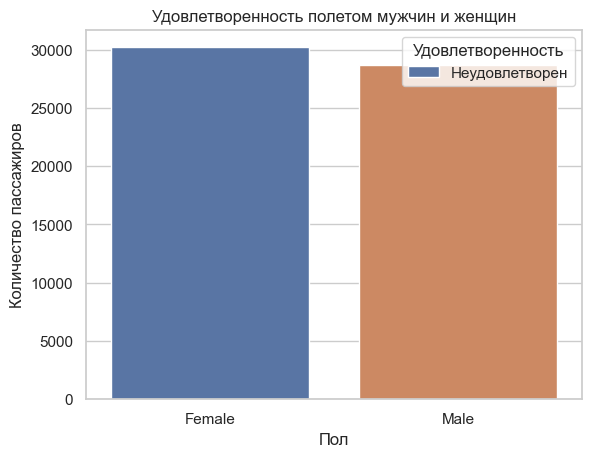

In [128]:
sns.barplot(x=gender_satisfied.index, y="neutral or dissatisfied", data=gender_satisfied, label='Неудовлетворен')
plt.title('Удовлетворенность полетом мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.legend(title='Удовлетворенность')

plt.show()

In [129]:
type_travel = pass_df.groupby(['Type of Travel', 'satisfaction']).size().unstack()
type_travel

satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,29909,41746
Personal Travel,28970,3279


In [130]:
class_tr = type_travel = pass_df.groupby(['Class', 'satisfaction']).size().unstack()
class_tr

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,15185,34480
Eco,38044,8701
Eco Plus,5650,1844


In [131]:
pass_df['satisfaction'] = pass_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
pass_df['Customer Type'] = pass_df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
pass_df['Type of Travel'] = pass_df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
pass_df['Gender'] = pass_df['Gender'].map({'Male': 0, 'Female': 1})
pass_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,0,23,1,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,0,1,49,1,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,0,0,30,1,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,1,0,22,1,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [132]:
dummies = pd.get_dummies(pass_df['Class'])
dummies

,Business,Eco,Eco Plus
0,False,False,True
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
103899,False,True,False
103900,True,False,False
103901,True,False,False
103902,False,True,False


In [133]:
df_encoded = pd.concat([pass_df, dummies], axis=1)
df = df_encoded.drop('Class', axis=1)


In [134]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)

In [136]:
# Создание объекта StandardScaler и обучение на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразование обучающей и тестовой выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
# Создание и обучение логистической регрессии
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = lr.predict(X_test_scaled)

# Вычисление метрики f1_score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(round(f1, 3))

0.855


In [138]:
# Создание и обучение модели AdaBoost с базовой моделью решающего дерева
base_model = DecisionTreeClassifier(random_state=26)
ada_boost_model = AdaBoostClassifier(base_model, learning_rate=0.01, random_state=26)
ada_boost_model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = ada_boost_model.predict(X_test_scaled)

# Вычисление метрики f1_score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(round(f1, 3))

0.94


In [139]:
# Параметры для поиска
params = {"n_estimators": 2 ** np.arange(8), "learning_rate": 0.1 ** np.arange(3)}

# Создание модели градиентного бустинга
gbc = GradientBoostingClassifier(random_state=42)

# Настройка параметров с помощью GridSearchCV
grid_search = GridSearchCV(gbc, params, cv=3, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Лучший результат на тренировочных данных
best_f1_score = grid_search.best_score_

# Вывод результата
print(round(best_f1_score, 3))

0.949


In [140]:
# Создание и обучение модели XGBoost
xgb = XGBClassifier(random_state=26)
xgb.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = xgb.predict(X_test_scaled)

# Вычисление метрики f1_score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(round(f1, 3))

0.957


In [153]:
# Создание и обучение модели CatBoost
cat = CatBoostClassifier(random_state=26, verbose=0)
cat.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = cat.predict(X_test_scaled)

# Вычисление метрики f1_score
f1 = f1_score(y_test, y_pred)

# Вывод результата
print(round(f1, 3))


0.96


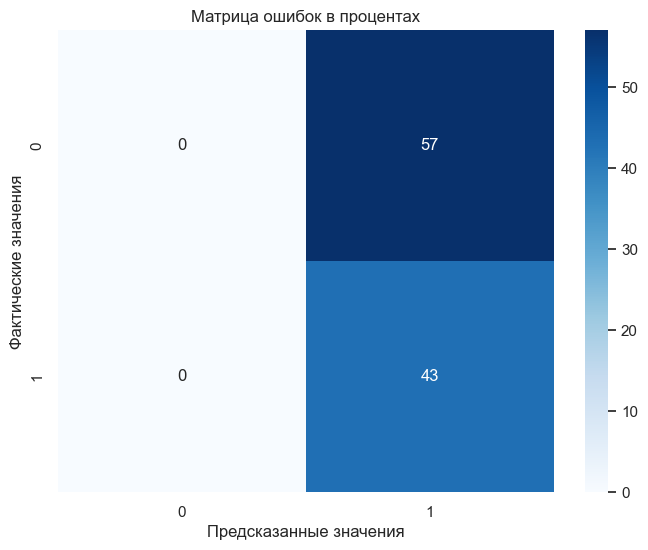

In [159]:
# Получение матрицы ошибок
cm = get_confusion_matrix(cat, Pool(X_train, y_train)) 

# Перевод значений в проценты от общего числа наблюдений и округление до целых
total_samples = len(y_train)
conf_matrix_percent = (cm / total_samples) * 100
conf_matrix_percent = np.round(conf_matrix_percent, 0)

# Визуализация матрицы ошибок в виде тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, cmap="Blues")
plt.title('Матрица ошибок в процентах')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.show()




In [160]:
# Оценка важности признаков для модели CatBoost
importances = cat.get_feature_importance(type="PredictionValuesChange")

# Создание списка названий признаков
feature_names = X.columns

# Сводка по важности признаков
feature_importance_summary = list(zip(feature_names, importances))
feature_importance_summary.sort(key=lambda x: x[1], reverse=True)
feature_importance_summary


[('Inflight wifi service', 25.364736634153907),
 ('Type of Travel', 18.391876066428242),
 ('Online boarding', 7.4014829615876545),
 ('Customer Type', 7.240564335568149),
 ('Business', 5.420057421172246),
 ('Checkin service', 3.9257911221021797),
 ('Age', 3.7423495980261605),
 ('Baggage handling', 3.640797508132477),
 ('Gate location', 3.196285720860678),
 ('Seat comfort', 3.0124545182705718),
 ('Inflight service', 2.8722625306176504),
 ('Inflight entertainment', 2.8396598613992086),
 ('id', 1.9588210834416606),
 ('Flight Distance', 1.593574467686911),
 ('Departure/Arrival time convenient', 1.5740781826683854),
 ('Cleanliness', 1.5545628597564356),
 ('Ease of Online booking', 1.4985633479713139),
 ('On-board service', 1.482136494751744),
 ('Leg room service', 1.2179273112662887),
 ('Arrival Delay in Minutes', 0.8355553936852904),
 ('Departure Delay in Minutes', 0.4457035199059791),
 ('Food and drink', 0.36924112244209056),
 ('Eco', 0.23043581374860847),
 ('Eco Plus', 0.1380827792885547)